In [1]:
import sympy as smp
from sympy import *
import numpy as np
from numpy import *
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from fractions import Fraction
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(["science", "notebook", "grid"])

x, y, t, n, a, b, C, c, r, u, s, A, i, j, k, z, w = smp.symbols(
    "x y t n a b C c r u s A i j k z w"
)
f, g, m = smp.symbols("f g m", cls=smp.Function)

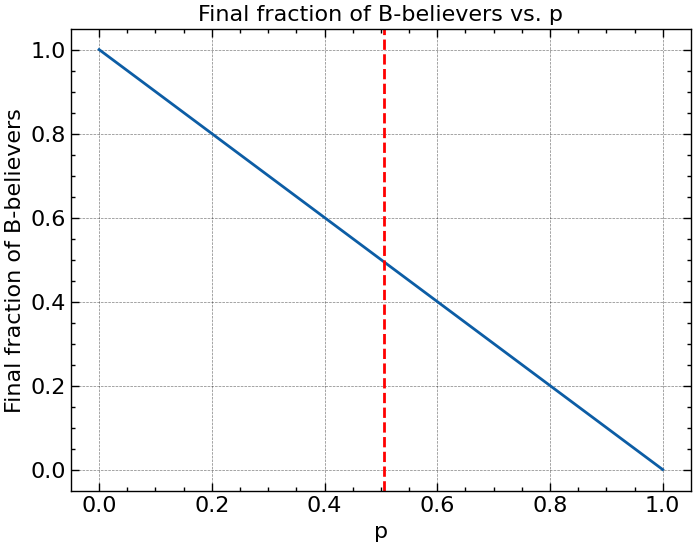

Critical fraction p_c: 0.5050505050505051


In [14]:
# 8.1.15
# b)

# Differential equations
def model(y, t, p):
    nA, nB = y
    nAB = 1 - (p + nA) - nB
    dnA_dt = (p + nA) * nAB - nA * nB
    dnB_dt = nB * nA - (p + nA) * nAB
    return [dnA_dt, dnB_dt]


# Initial conditions
nA0 = 0.0
nB0 = 1.0  # This will be adjusted for each p

# Time points
t = np.linspace(0, 100, 200)

# Vary p and solve the equations
p_values = np.linspace(0, 1, 100)
final_nB = []

for p in p_values:
    nB0 = 1 - p
    y0 = [nA0, nB0]
    solution = odeint(model, y0, t, args=(p,))
    final_nB.append(solution[-1, 1])

# Find critical p_c
p_c = p_values[next(i for i, nB in enumerate(final_nB) if nB < 0.5)]

# Plotting
plt.plot(p_values, final_nB)
plt.axvline(x=p_c, color="r", linestyle="--")
plt.xlabel("p")
plt.ylabel("Final fraction of B-believers")
plt.title("Final fraction of B-believers vs. p")
plt.show()

print(f"Critical fraction p_c: {p_c}")

In [16]:
# Define the symbols
n_A, n_B, p = smp.symbols("n_A n_B p")

# Define the differential equations
eq1 = (p + n_A) * (1 - (p + n_A) - n_B) - n_A * n_B
eq2 = n_B * n_A - (p + n_A) * (1 - (p + n_A) - n_B)

# Solve for equilibrium points
equilibrium_points = smp.solve([eq1, eq2], (n_A, n_B))

# Define the system of equations as a matrix
F = smp.Matrix([eq1, eq2])

# Compute the Jacobian matrix
J = F.jacobian([n_A, n_B])

# Evaluate the Jacobian at each equilibrium point and find eigenvalues
for point in equilibrium_points:
    J_evaluated = J.subs({n_A: point[0], n_B: point[1]})
    eigenvalues = J_evaluated.eigenvals()
    print(f"Equilibrium point: {point}, Eigenvalues: {eigenvalues}")

# Additional analysis may be required to find the exact value of p_c

Equilibrium point: (n_A, (-n_A**2 - 2*n_A*p + n_A - p**2 + p)/(2*n_A + p)), Eigenvalues: {(2*n_A**2 + 2*n_A*p + p**2 - p)/(2*n_A + p): 1, 0: 1}


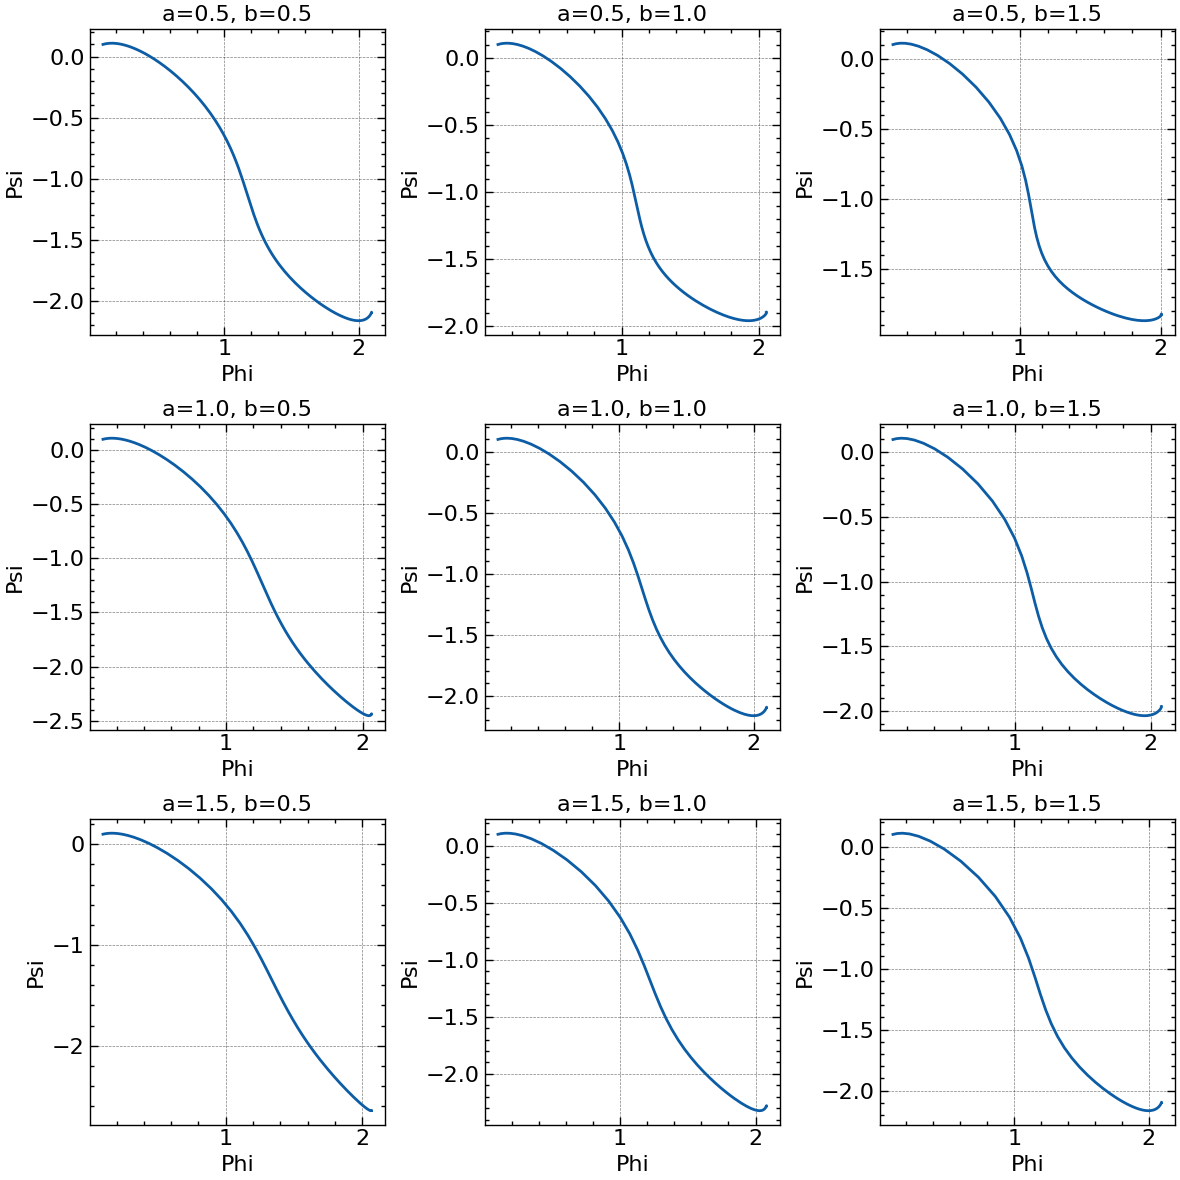

In [25]:
# 8.6.9
# c

# Define the differential equations for the three-frog system
def three_frog_system(y, t, a, b):
    phi, psi = y
    dphi_dt = (
        2 * a * np.sin(phi)
        - a * np.sin(psi - phi)
        + a * np.sin(psi)
        + 2 * b * np.sin(2 * phi)
        - b * np.sin(2 * (psi - phi))
        + b * np.sin(2 * psi)
    )
    dpsi_dt = (
        -a * np.sin(phi)
        + 2 * a * np.sin(psi)
        - a * np.sin(phi - psi)
        - b * np.sin(2 * phi)
        + 2 * b * np.sin(2 * psi)
        - b * np.sin(2 * (phi - psi))
    )
    return [dphi_dt, dpsi_dt]


# Parameters for exploration
a_values = [0.5, 1.0, 1.5]  # Example values for a
b_values = [0.5, 1.0, 1.5]  # Example values for b
initial_conditions = [0.1, 0.1]  # Initial conditions for phi and psi
t = np.linspace(0, 100, 5000)  # Time array

# Plot phase portraits for different a and b values
fig, axs = plt.subplots(len(a_values), len(b_values), figsize=(12, 12))
for i, a in enumerate(a_values):
    for j, b in enumerate(b_values):
        solution = odeint(three_frog_system, initial_conditions, t, args=(a, b))
        phi, psi = solution.T
        axs[i, j].plot(phi, psi)
        axs[i, j].set_title(f"a={a}, b={b}")
        axs[i, j].set_xlabel("Phi")
        axs[i, j].set_ylabel("Psi")

plt.tight_layout()
plt.show()

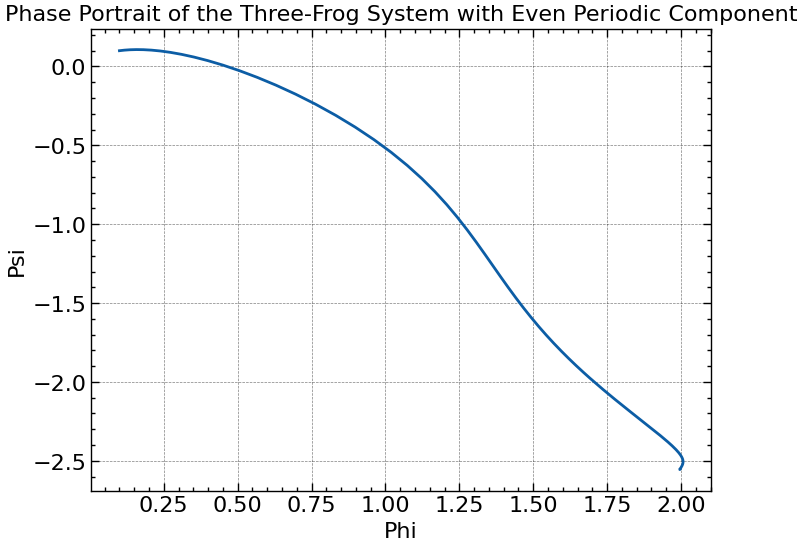

In [23]:
# 8.6.9
# d

# Define the differential equations for the three-frog system with the new H(x)
def three_frog_system(y, t, a, b, c):
    phi, psi = y
    dphi_dt = (
        2 * a * np.sin(phi)
        - a * np.sin(psi - phi)
        + a * np.sin(psi)
        + 2 * b * np.sin(2 * phi)
        - b * np.sin(2 * (psi - phi))
        + b * np.sin(2 * psi)
        + 2 * c * np.cos(phi)
        - c * np.cos(psi - phi)
        + c * np.cos(psi)
    )
    dpsi_dt = (
        -a * np.sin(phi)
        + 2 * a * np.sin(psi)
        - a * np.sin(phi - psi)
        - b * np.sin(2 * phi)
        + 2 * b * np.sin(2 * psi)
        - b * np.sin(2 * (phi - psi))
        - c * np.cos(phi)
        + 2 * c * np.cos(psi)
        - c * np.cos(phi - psi)
    )
    return [dphi_dt, dpsi_dt]


# Parameters
a = 1.0  # Adjust as needed
b = 0.5  # Adjust as needed
c = 0.1  # Small even periodic component
initial_conditions = [0.1, 0.1]  # Initial conditions for phi and psi
t = np.linspace(0, 100, 5000)  # Time array

# Solve the differential equations
solution = odeint(three_frog_system, initial_conditions, t, args=(a, b, c))

# Extract solutions
phi, psi = solution.T

# Plotting the phase portrait
plt.plot(phi, psi)
plt.xlabel("Phi")
plt.ylabel("Psi")
plt.title("Phase Portrait of the Three-Frog System with Even Periodic Component")
plt.show()